# Color

Richell Flores

# Objectives

By the end of this notebook, students are expected to
- convert a color image from one color model to another
- perform basic color transformations

# Main References

Course notebook from Guadalupe, 2024

# Required Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image, ImageFilter, ImageOps, ImageChops, ImageColor, ImageCms, ImageEnhance

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Helper functions

In [4]:
def show_rgb(R, G, B):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(R, cmap='gray', vmin=0, vmax=255)
    ax1.title.set_text('Red')
    ax2.imshow(G, cmap='gray', vmin=0, vmax=255)
    ax2.title.set_text('Green')
    ax3.imshow(B, cmap='gray', vmin=0, vmax=255)
    ax3.title.set_text('Blue')

In [5]:
def show_hsi(H, S, I):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(H, cmap='hsv', vmin=0, vmax=255)
    ax1.title.set_text('Hue')
    ax2.imshow(S, cmap='gray', vmin=0, vmax=255)
    ax2.title.set_text('Saturation')
    ax3.imshow(I, cmap='gray', vmin=0, vmax=255)
    ax3.title.set_text('Intensity')

# Color transformation

The concepts of channel extraction, color smoothing and sharpening are available in the Project 1 specification. In this section, we will be focusing on the color transformations discussed in class. We will be using the following image to experiment on the transformations.

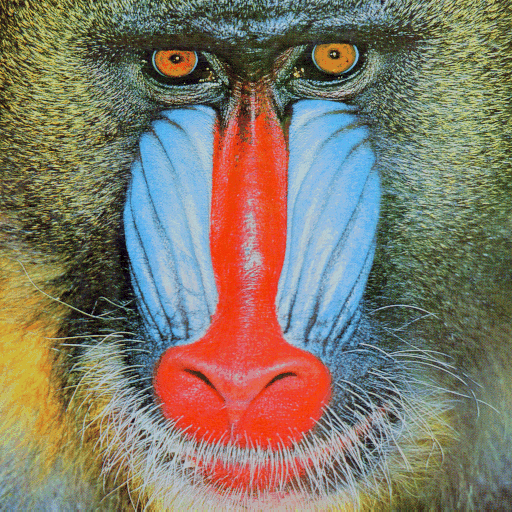

In [6]:
mandril_color = Image.open("/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/mandril_color.tif")
mandril_color

Let's check the color model used for this image.

In [7]:
print(mandril_color.mode)

RGB


In [8]:
mandril_r = mandril_color.split()[0]
mandril_g = mandril_color.split()[1]
mandril_b = mandril_color.split()[2]

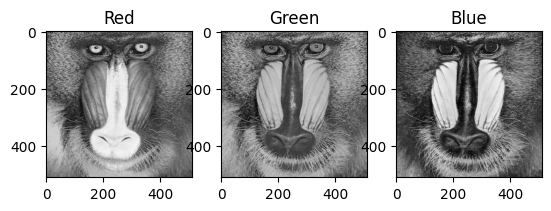

In [9]:
show_rgb(mandril_r, mandril_g, mandril_b)

## Color model conversion

To convert modes, we use `image_name.convert(mode)`.

In [10]:
mandril_color_hsi = mandril_color.convert('HSV')

In [12]:
mandril_color_hsi

ValueError: Could not save to PNG for display

<PIL.Image.Image image mode=HSV size=512x512>

In [13]:
mandril_h = mandril_color_hsi.split()[0]
mandril_s = mandril_color_hsi.split()[1]
mandril_i = mandril_color_hsi.split()[2]

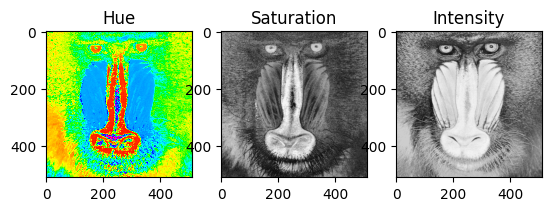

In [14]:
show_hsi(mandril_h, mandril_s, mandril_i)

Q: Where are the areas where the image is most saturated?

## Intensity transformation

Recall the for an image $f(m,n)$, the intensity transformation considers an intensity scaling factor $k \in (0,1)$.

The implementation varies per color model.

### RGB

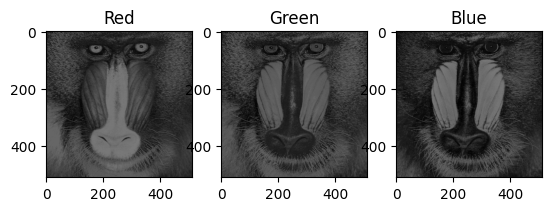

In [15]:
# prompt: implement scaling factor for mandril_r, mandril_g, mandril_b

import numpy as np
# Convert images to numpy arrays
mandril_r_np = np.array(mandril_r)
mandril_g_np = np.array(mandril_g)
mandril_b_np = np.array(mandril_b)

# Define the scaling factor
k = 0.5  # Example scaling factor

# Apply the scaling factor
mandril_r_scaled = (mandril_r_np * k).astype(np.uint8)
mandril_g_scaled = (mandril_g_np * k).astype(np.uint8)
mandril_b_scaled = (mandril_b_np * k).astype(np.uint8)

# Convert back to PIL Images
mandril_r_scaled = Image.fromarray(mandril_r_scaled)
mandril_g_scaled = Image.fromarray(mandril_g_scaled)
mandril_b_scaled = Image.fromarray(mandril_b_scaled)

# Display the scaled images
show_rgb(mandril_r_scaled, mandril_g_scaled, mandril_b_scaled)


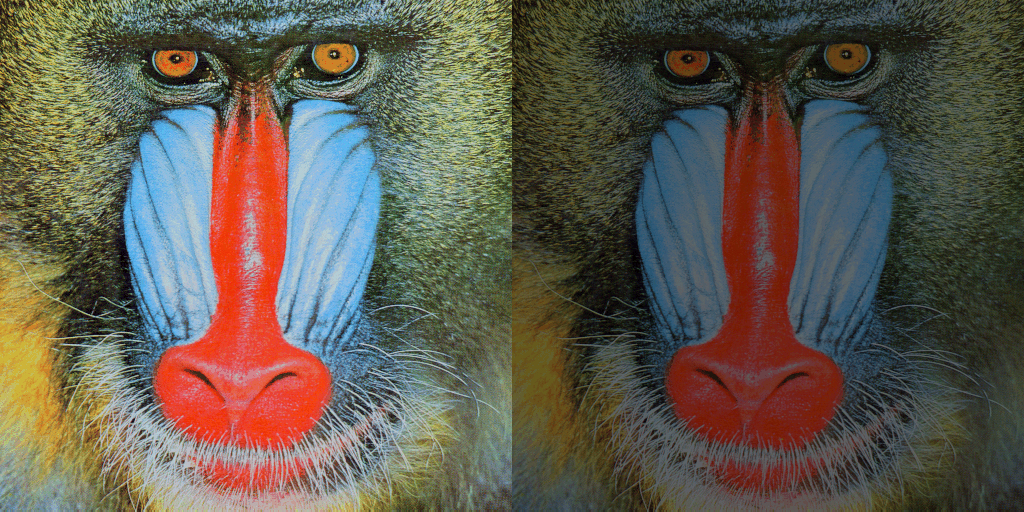

In [16]:
# prompt: show before and after image side-by-side

mandril_intensity_merged = Image.merge('RGB', (mandril_r_scaled, mandril_g_scaled, mandril_b_scaled))

# Combine the original and scaled images horizontally
combined_image = Image.new('RGB', (mandril_r.width * 2, mandril_r.height))
combined_image.paste(mandril_color, (0, 0))
combined_image.paste(mandril_intensity_merged, (mandril_r.width, 0))

# Display the combined image
display(combined_image)


Or by using Pillow functions

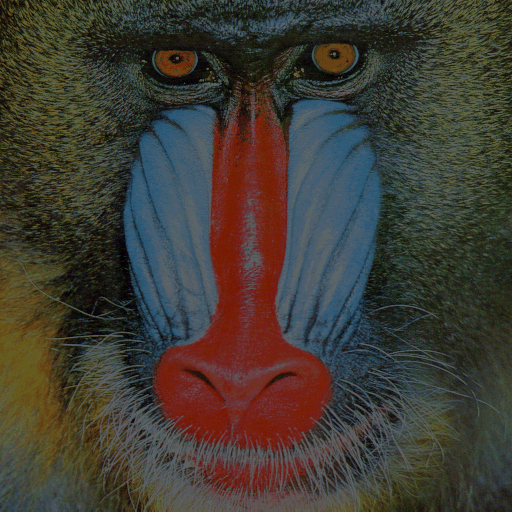

In [17]:
# Define the intensity scaling factor (e.g., 1.5 for increasing brightness, 0.5 for decreasing)
scaling_factor = 0.5

mandril_intensity_enhance = ImageEnhance.Brightness(mandril_color).enhance(scaling_factor)
mandril_intensity_enhance

In [18]:
# Convert images to arrays
mandril_intensity_merged_array = np.array(mandril_intensity_merged)
mandril_intensity_enhance_array = np.array(mandril_intensity_enhance)

# Check if the images are identical
if np.array_equal(mandril_intensity_merged_array, mandril_intensity_enhance_array):
  print("The images are identical.")
else:
  print("The images are not identical.")

The images are identical.


### HSI

In [19]:
k = 0.5
mandril_i_scaled = (np.array(mandril_i) * k).astype(np.uint8)

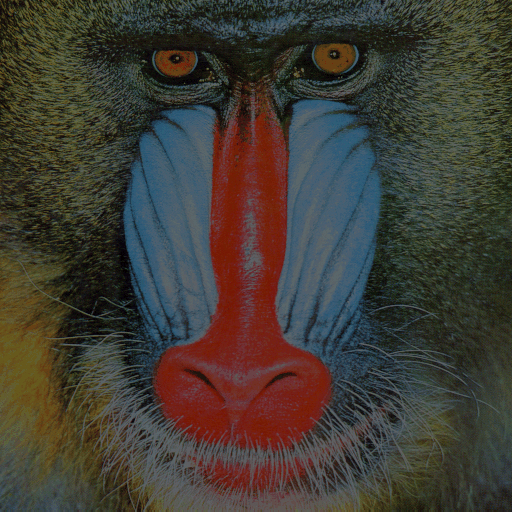

In [20]:
# prompt: recombine HSI channels and display image by converting back to RGB

# Convert back to PIL Image
mandril_i_scaled = Image.fromarray(mandril_i_scaled)

# Recombine the HSI channels
mandril_hsi_scaled = Image.merge('HSV', (mandril_h, mandril_s, mandril_i_scaled))

# Convert back to RGB
mandril_rgb_scaled = mandril_hsi_scaled.convert('RGB')

# Display the image
display(mandril_rgb_scaled)

In [21]:
# prompt: check for difference in mandril_hsi_scaled and mandril_rbg_scaled

import numpy as np
# Convert images to arrays
mandril_hsi_scaled_array = np.array(mandril_hsi_scaled)
mandril_rgb_scaled_array = np.array(mandril_rgb_scaled)

# Check if the images are identical
if np.array_equal(mandril_hsi_scaled_array, mandril_rgb_scaled_array):
  print("The images are identical.")
else:
  print("The images are not identical.")


The images are not identical.


## Color complementation

Color complementation is better done in RGB.

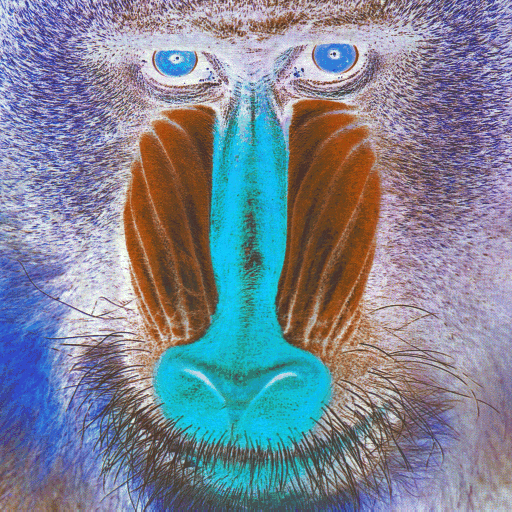

In [22]:
mandril_r_np_c = 255 - mandril_r_np
mandril_g_np_c = 255 - mandril_g_np
mandril_b_np_c = 255 - mandril_b_np

mandril_r_np_c_im = Image.fromarray(mandril_r_np_c)
mandril_g_np_c_im = Image.fromarray(mandril_g_np_c)
mandril_b_np_c_im = Image.fromarray(mandril_b_np_c)

mandril_complement_merged = Image.merge('RGB', (mandril_r_np_c_im, mandril_g_np_c_im, mandril_b_np_c_im))
mandril_complement_merged

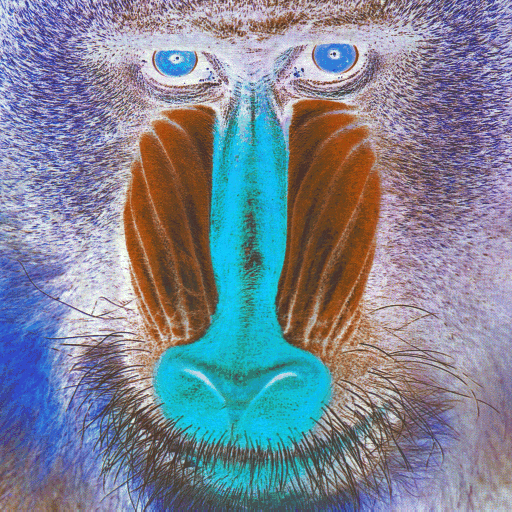

In [23]:
mandril_c = ImageOps.invert(mandril_color)
mandril_c

In [24]:
# prompt: check for difference

import numpy as np
# Convert images to arrays
mandril_complement_merged_array = np.array(mandril_complement_merged)
mandril_c_array = np.array(mandril_c)

# Check if the images are identical
if np.array_equal(mandril_complement_merged_array, mandril_c_array):
  print("The images are identical.")
else:
  print("The images are not identical.")


The images are identical.


## Color slicing

In [25]:
# Function to normalize RGB values to the range [0, 1]
def normalize_rgb(color):
    return tuple([x / 255.0 for x in color])

# Function to calculate Euclidean distance in normalized RGB space
def rgb_distance_normalized(color1, color2):
    return np.sqrt(np.sum((np.array(color1) - np.array(color2)) ** 2))

# Function to apply color slicing with normalized values
def color_slicing_normalized(image, target_color, radius):
    # Normalize the target color
    target_color = normalize_rgb(target_color)

    # Load image and convert to RGB
    image = image.convert('RGB')
    pixels = image.load()

    # Iterate through all pixels
    for i in range(image.width):
        for j in range(image.height):
            current_color = normalize_rgb(pixels[i, j])  # Normalize pixel color
            # Calculate the distance between the normalized pixel color and the target color
            distance = rgb_distance_normalized(current_color, target_color)
            if distance > radius:
                # Set pixels outside the sphere to gray
                pixels[i, j] = (128, 128, 128)

    return image

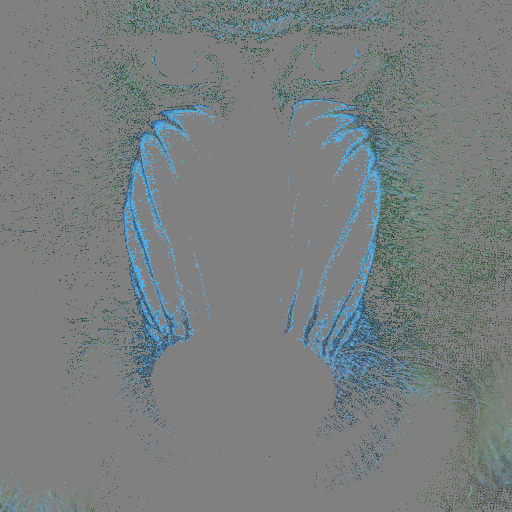

In [26]:
# Define the target color (e.g., red) and radius (normalized to the range 0-1)
target_color = (0, 150, 150)  # RGB value of target color (before normalization)
radius = 0.5  # Normalized threshold distance in RGB space (range [0, 1])

# Apply color slicing with normalized values
sliced_image = color_slicing_normalized(mandril_color, target_color, radius)
sliced_image

**Exercise:** Recreate the example in Fig. 6.32 in Gonzales. Apply color slicing with an RGB sphere centered in $(0.6863, 0.1608, 0.1922)$ with radius $0.1765$.

*Hint:* Convert the color center to RGB.

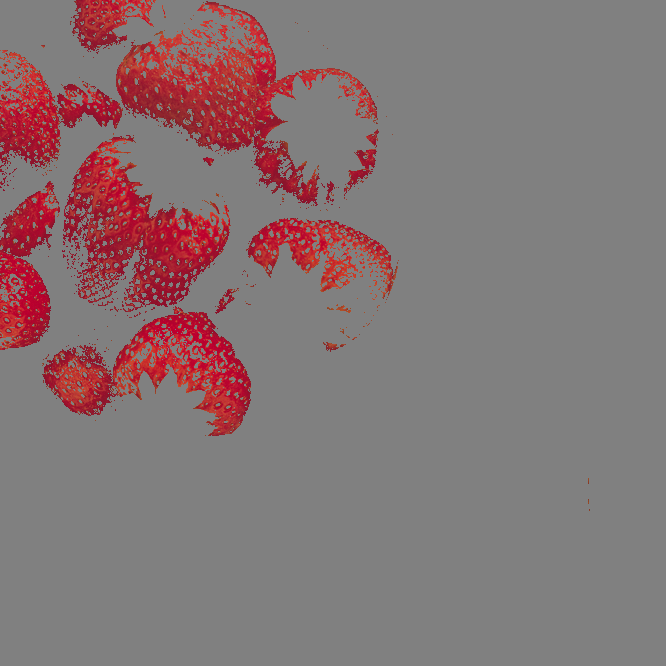

In [33]:
strawberry = Image.open("/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/strawberry.tif")
strawberry

rgb_center_normalized = (0.6863, 0.1608, 0.1922)
radius = 0.1765
rgb_center = []
for x in rgb_center_normalized:
    rgb_center.append(x*255)

rgb_center = tuple(rgb_center)

sliced_image = color_slicing_normalized(strawberry, rgb_center, radius)
sliced_image

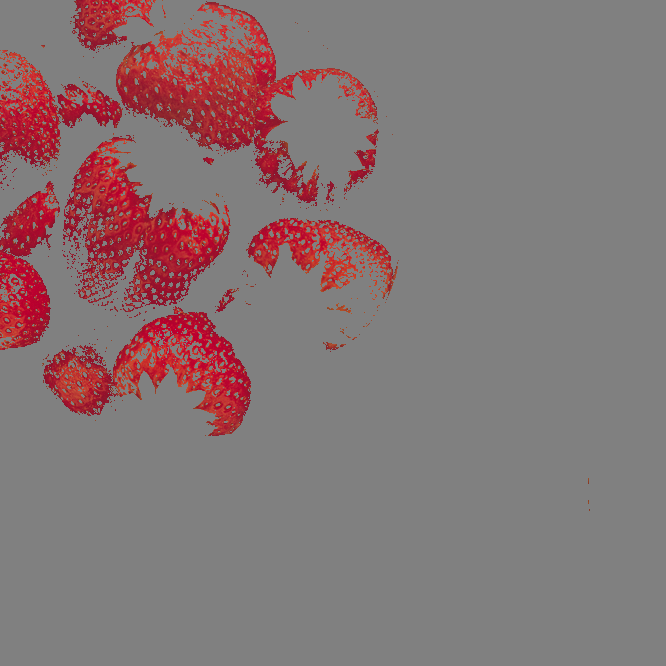

In [ ]:
# insert your code here
# expected output below

## Tone and color corrections

For our demonstration, we will be using Snapseed or Lightroom.